# Libraries

In [16]:
import os
import mySecrets
# from secrets import *
import torch
from PIL import Image
import matplotlib.pyplot as plt


# Requirements and data

In [17]:
workDir = 'c:\\Users\\evgen\\Desktop\\230416_yolo'

In [18]:
projectDir = os.getcwd()
print(projectDir)
### Clone YOLOv5 if not cloned yet
if 'yolov5' not in os.listdir():
	!git clone https://github.com/ultralytics/yolov5
	print(" > Successfully cloned github repo of YOLOv5!")
else:
	print(' > yolov5 repo already present.')

if os.path.basename(os.getcwd()) != 'yolov5':
	%cd yolov5
print(f" > Current dir: {os.getcwd()}")
### Install dependencies
%pip install -qr requirements.txt
%pip install -q roboflow

# import torch

c:\Users\evgen\Desktop\230416_yolo
 > yolov5 repo already present.
c:\Users\evgen\Desktop\230416_yolo\yolov5
 > Current dir: c:\Users\evgen\Desktop\230416_yolo\yolov5
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Download dataset

We get the pre-annotated dataset from: https://public.roboflow.com/object-detection/bccd/4

In [19]:
os.environ["DATASET_DIRECTORY"] = "c:\\Users\\evgen\\Desktop\\230416_yolo"

In [20]:
os.listdir(workDir)

['.gitignore',
 'BCCD-4',
 'main_GoogleColabTrain.ipynb',
 'main_localTrain.ipynb',
 'mySecrets.py',
 'yolov5',
 '__pycache__']

In [21]:
from roboflow import Roboflow

if 'BCCD-4' not in os.listdir(workDir):
	rf = Roboflow(api_key=mySecrets.API_KEY)
	project = rf.workspace("joseph-nelson").project("bccd")
	dataset = project.version(4).download("yolov5")
	print(" > Downloaded dataset!")
	### Delete the variable to free up RAM
	del dataset
else:
	print(" > Dataset already present.")


 > Dataset already present.


# Train

In [17]:
### Change the 'data.yaml' file from the downloaded datasets folder ('datasets/BCCD-4/data.yaml'):
### simply add directory for 'test'

In [22]:
os.getcwd()

'c:\\Users\\evgen\\Desktop\\230416_yolo\\yolov5'

In [21]:
### The following command will be run in the terminal. 
### In my case, the command doesn't run in the notebook cell, 
### so i copy and paste it to run it in the terminal,
### e.g. in the Powershell of VScode
!python train.py --img 416 --batch 1 --epochs 5 --data c:/Users/evgen/Desktop/230416_yolo/BCCD-4/data.yaml --weights yolov5n.pt


train: weights=yolov5n.pt, cfg=, data=c:/Users/evgen/Desktop/230416_yolo/BCCD-4/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=1, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-145-g94714fe Python-3.10.6 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, 

requirements: C:\Users\evgen\Desktop\230416_yolo\requirements.txt not found, check failed.


        3/4     0.357G    0.05668      0.125    0.01056         19        416:  45%|████▍     | 342/765 [00:34<00:43,  9.81it/s]
        3/4     0.357G    0.05667     0.1249    0.01056         16        416:  45%|████▍     | 342/765 [00:34<00:43,  9.81it/s]
        3/4     0.357G    0.05667     0.1249    0.01056         16        416:  45%|████▍     | 343/765 [00:34<00:43,  9.70it/s]
        3/4     0.357G    0.05665     0.1248    0.01057         11        416:  45%|████▍     | 343/765 [00:34<00:43,  9.70it/s]
        3/4     0.357G    0.05665     0.1248    0.01057         11        416:  45%|████▍     | 344/765 [00:34<00:43,  9.63it/s]
        3/4     0.357G    0.05664     0.1247    0.01056          8        416:  45%|████▍     | 344/765 [00:34<00:43,  9.63it/s]
        3/4     0.357G    0.05666     0.1249    0.01055         37        416:  45%|████▍     | 344/765 [00:34<00:43,  9.63it/s]
        3/4     0.357G    0.05666     0.1249    0.01055         37        416:  45%|████▌     | 3

# Performance

In [23]:

%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
### Get test metrics

In [24]:
!python val.py --task test --weights runs/train/exp3/weights/best.pt --img 416 --data c:/Users/evgen/Desktop/230416_yolo/BCCD-4/data.yaml

requirements: C:\Users\evgen\Desktop\230416_yolo\requirements.txt not found, check failed.


val: data=c:/Users/evgen/Desktop/230416_yolo/BCCD-4/data.yaml, weights=['runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-145-g94714fe Python-3.10.6 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs

test: Scanning C:\Users\evgen\Desktop\230416_yolo\BCCD-4\test\labels...:   0%|          | 0/36 [00:00<?, ?it/s]
test: Scanning C:\Users\evgen\Desktop\230416_yolo\BCCD-4\test\labels... 1 images, 0 backgrounds, 0 corrupt:   3%|▎         | 1/36 [00:14<08:27, 14.50s/it]
test: Scanning C:\Users\evgen\Desktop\230416_yolo\BCCD-4\test\labels... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:14<00:00,  2

In [25]:
### Make predictions on images and save them
!python detect.py --weights runs/train/exp3/weights/best.pt --img 416 --conf 0.1 --source c:/Users/evgen/Desktop/230416_yolo/BCCD-4/test/images

requirements: C:\Users\evgen\Desktop\230416_yolo\requirements.txt not found, check failed.

detect: weights=['runs/train/exp3/weights/best.pt'], source=c:/Users/evgen/Desktop/230416_yolo/BCCD-4/test/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-145-g94714fe Python-3.10.6 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs
image 1/36 C:\Users\evgen\Desktop\230416_yolo\BCCD-4\test\images\BloodImage_00038_jpg.rf.ffa23e4b5b55b523367f332af726eae8.jpg: 416x416 2 Plateletss, 39 RBCs, 1 WBC, 9.0ms
image 2/36 C:\Users\evgen\Desktop\230416_yolo\BCCD-4\test\images\BloodImage_00044_jpg.rf.e7760375eba4bc20c5746367e2311e18.jpg: 416

BloodImage_00038_jpg.rf.ffa23e4b5b55b523367f332af726eae8.jpg
BloodImage_00044_jpg.rf.e7760375eba4bc20c5746367e2311e18.jpg
BloodImage_00062_jpg.rf.1be1ca0ecdf783798fc10346baaa203e.jpg
BloodImage_00090_jpg.rf.cdbf8f6ed3b93fa902a0bc991132cb40.jpg
BloodImage_00099_jpg.rf.e3c42cd68359527494a53843479dff5c.jpg


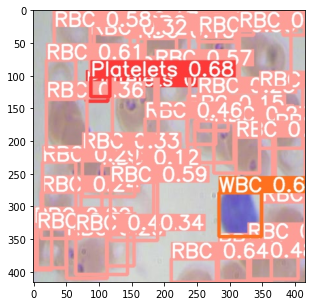

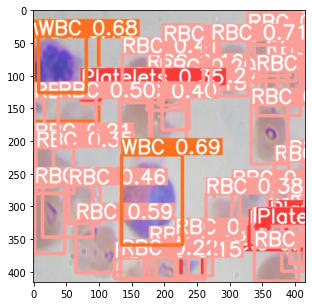

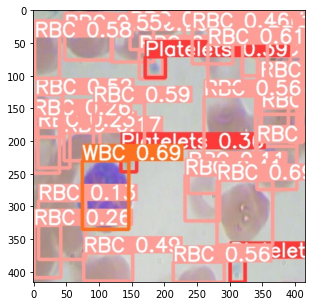

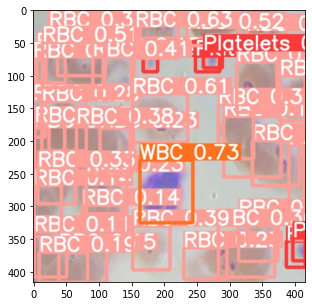

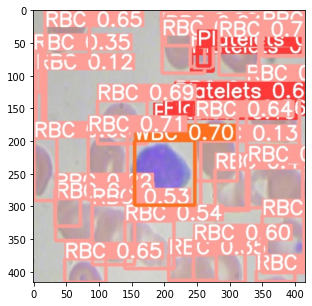

In [26]:
### Show the predicted images
test_images = 'c:/Users/evgen/Desktop/230416_yolo/yolov5/runs/detect/exp'
os.listdir(test_images)

for i,j in enumerate(os.listdir(test_images), 1):
	print(j)
	image = Image.open(f"{test_images}/{j}")
	# image.show()
	plt.figure(figsize=(5,5))
	plt.imshow(image)
	if i == 5:
		break

